In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
GS = pd.read_excel('Projeto 3 - Dataset Final.xlsx')
GS_idx = GS.set_index('Name')
GS_idx.head()

,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Name,,,,,,,,,,
Wii Sports,1,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
Super Mario Bros.,2,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
Mario Kart Wii,3,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
Wii Sports Resort,4,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
Pokemon Red/Pokemon Blue,5,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
Nome = GS.loc[:, ['Name']]
Plataforma = GS.loc[:, ['Platform']]
Ano = GS.loc[:, ['Year']]
Genero = GS.loc[:, ['Genre']]
Editor = GS.loc[:, ['Publisher']]
Vendas_AN = GS.loc[:, ['NA_Sales']]
Vendas_UE = GS.loc[:, ['EU_Sales']]
Vendas_JP = GS.loc[:, ['JP_Sales']]
Vendas_Outros = GS.loc[:, ['Other_Sales']]
Vendas_Globais = GS.loc[:, ['Global_Sales']]

In [4]:
PS4 = GS_idx[(GS_idx.Platform == "PS4")]
XOne = GS_idx[(GS_idx.Platform == "XOne")]
PC = GS_idx[(GS_idx.Platform == "PC")]

In [5]:
inter = GS_idx[(GS_idx.Platform == "PS4") | (GS_idx.Platform == "XOne") | (GS_idx.Platform == "PC")]

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


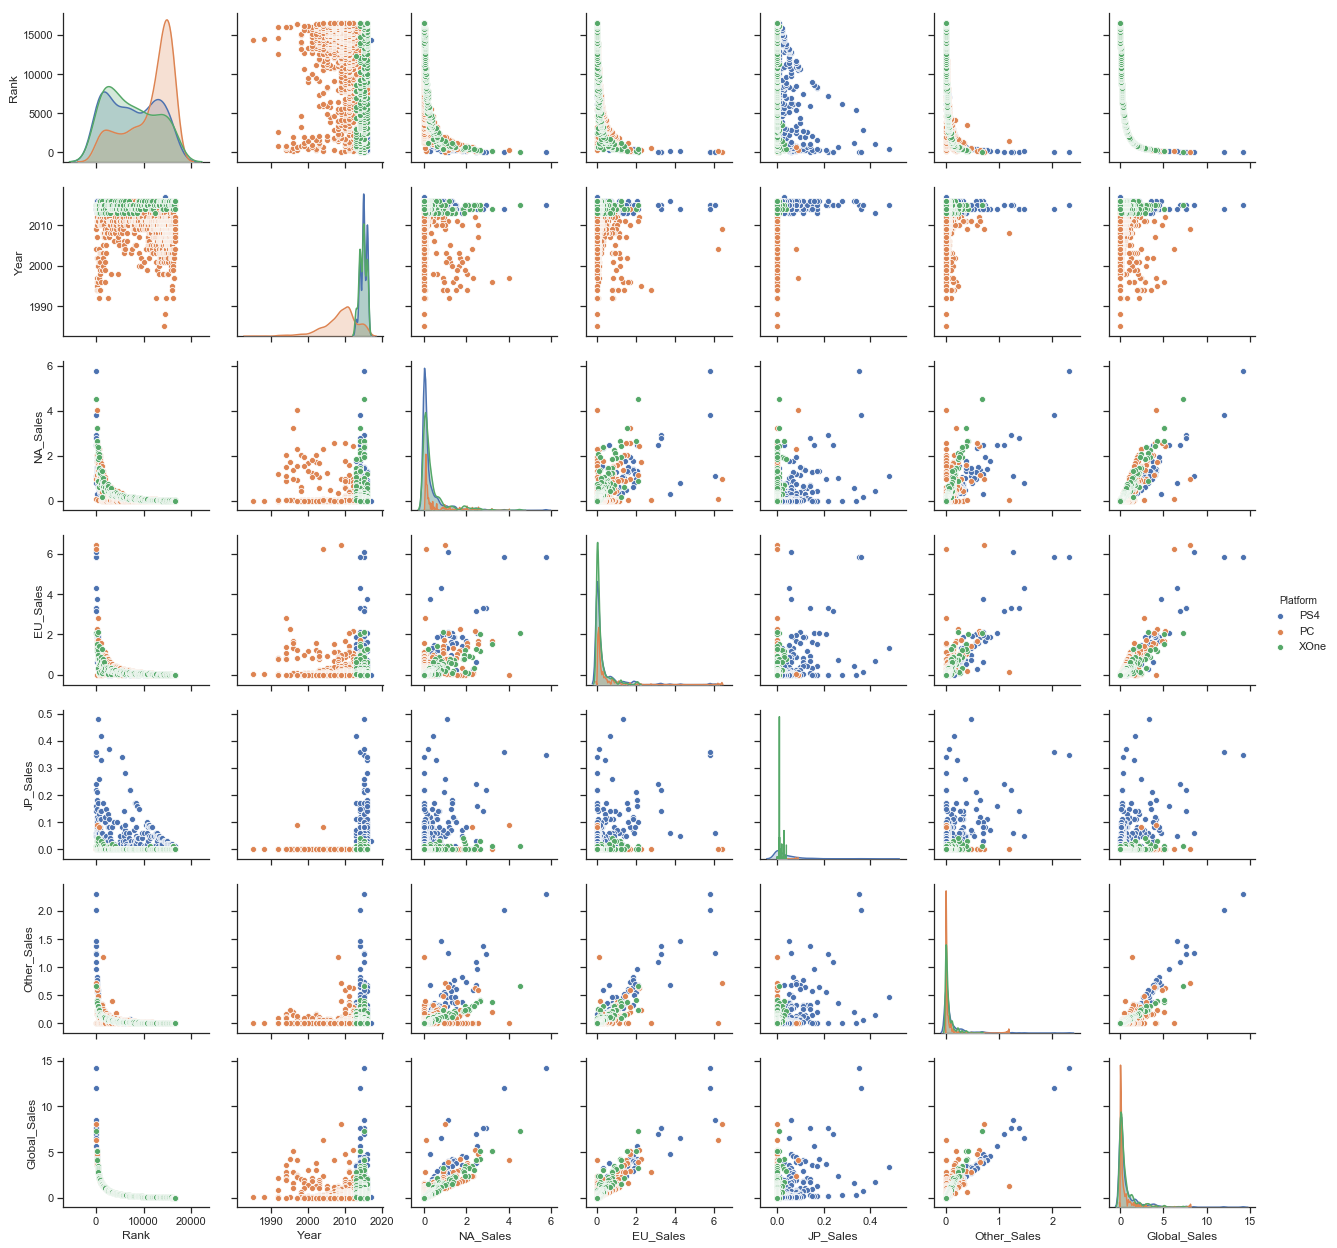

In [6]:
sns.set(style="ticks")

sns.pairplot(inter,hue="Platform");

count    1509.000000
mean        0.449291
std         1.043229
min         0.010000
25%         0.030000
50%         0.080000
75%         0.350000
max        14.240000
Name: Global_Sales, dtype: float64

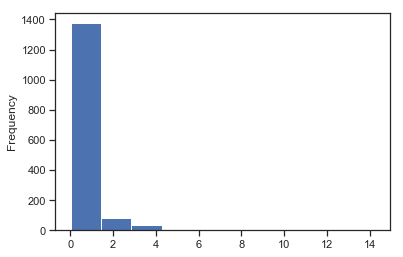

In [7]:
inter.Global_Sales.plot.hist()
inter.Global_Sales.describe()

count    1509.000000
mean        0.181093
std         0.479200
min         0.000000
25%         0.000000
50%         0.010000
75%         0.100000
max         5.770000
Name: NA_Sales, dtype: float64

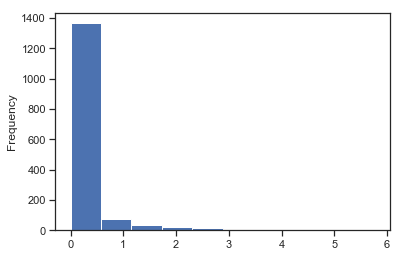

In [8]:
inter.NA_Sales.plot.hist()
inter.NA_Sales.describe()

count    1509.000000
mean        0.204791
std         0.520311
min         0.000000
25%         0.020000
50%         0.040000
75%         0.150000
max         6.420000
Name: EU_Sales, dtype: float64

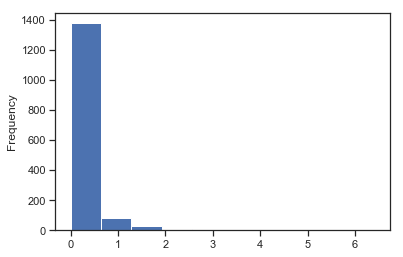

In [9]:
inter.EU_Sales.plot.hist()
inter.EU_Sales.describe()

count    1509.000000
mean        0.009814
std         0.037786
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.480000
Name: JP_Sales, dtype: float64

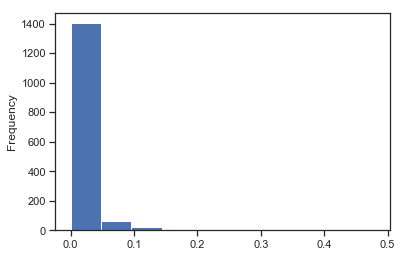

In [10]:
inter.JP_Sales.plot.hist()
inter.JP_Sales.describe()

count    1509.000000
mean        0.053108
std         0.149196
min         0.000000
25%         0.000000
50%         0.010000
75%         0.040000
max         2.310000
Name: Other_Sales, dtype: float64

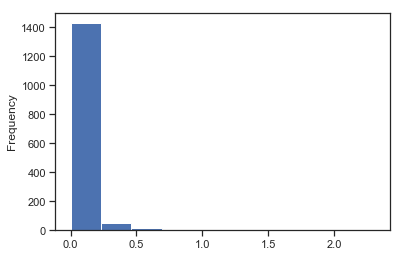

In [11]:
inter.Other_Sales.plot.hist()
inter.Other_Sales.describe()

In [12]:
ha = inter.Year.value_counts()

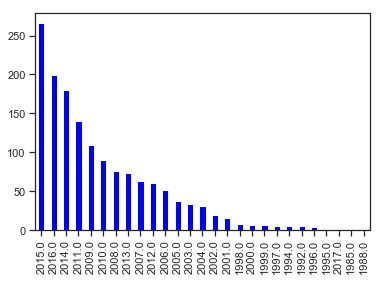

In [13]:
ha.plot(kind='bar', color=('blue'))

In [14]:
hg = inter.Genre.value_counts()

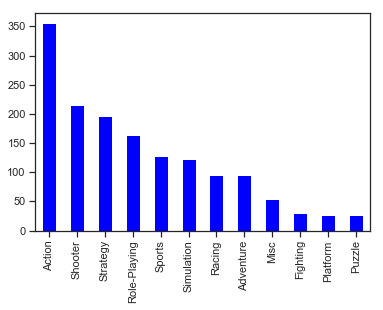

In [15]:
hg.plot(kind='bar', color=('blue'))

In [16]:
hp = inter.Publisher.value_counts()

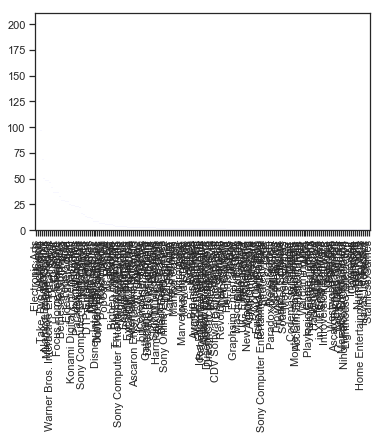

In [17]:
hp.plot(kind='bar', color=('blue'));

In [18]:
hpl = inter.Platform.value_counts()

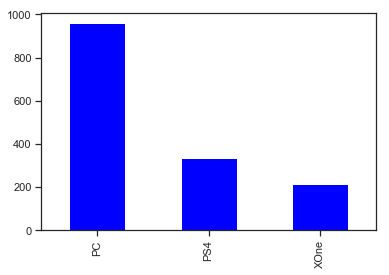

In [19]:
hpl.plot(kind='bar', color=('blue'))

In [20]:
def dummify(data, column_name):
    df = data.copy()
    df2 = pd.concat([df.drop(column_name, axis=1), pd.get_dummies(data[column_name],drop_first=False, prefix = column_name)], axis=1)
    return df2

def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    ypred = results.predict(X_cp)
    return results, ypred

In [21]:
inter.Genre = inter.Genre.astype("category")
x = dummify(inter, "Genre")
x = x.dropna()

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [22]:
cols = []
for i in x.columns:
    if i.startswith('Genre_'):
        cols.append(i)
Gen = x[cols]

In [23]:
inter.Genre= inter.Genre.astype("category")
z = dummify(inter, "Platform")
z = z.dropna()

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [24]:
cols = []
for i in z.columns:
    if i.startswith('Platform_'):
        cols.append(i)
plat = z[cols]

In [25]:
final = pd.concat([Gen, plat], axis=1, join_axes=[Gen.index])

In [26]:
re_dummy, predição_dummy = regress(final, z.Global_Sales)
re_dummy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     10.94
Date:                Thu, 22 Nov 2018   Prob (F-statistic):           1.16e-22
Time:                        21:28:21   Log-Likelihood:                -2113.0
No. Observations:                1487   AIC:                             4254.
Df Residuals:                    1473   BIC:                             4328.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3706      0.029     12.972      0.000       0.315       0.427
Genre_Action          -0.0123      0.061     -0.203      0.839      -0.131       0.107
Genre_Adventure       -0.1429      0.100     -1.423      0.155      -0.340       0.054
Genre_Fighting        -0.2488      0.177     -1.406      0.160      -0.596       0.098
Genre_Misc            -0.0117      0.133     -0.088      0.930      -0.273       0.250
Genre_Platform        -0.1539      0.185     -0.832      0.405      -0.517       0.209
Genre_Puzzle          -0.1364      0.186     -0.734      0.463      -0.501       0.228
Genre_Racing          -0.0872      0.102     -0.852      0.395      -0.288       0.114
Genre_Role-Playing     0.1473      0.080      1.835      0.067      -0.010       0.305
Genre_Shooter          0.4906      0.072      6.781      0.000       0.349       0.633
Genre_Simulation       0.2569      0.093      2.755      0.006       0.074       0.440
Genre_Sports           0.1985      0.090      2.218      0.027       0.023       0.374
Genre_Strategy         0.0703      0.078      0.900      0.368      -0.083       0.223
Platform_PC           -0.2216      0.037     -5.941      0.000      -0.295      -0.148
Platform_PS4           0.3921      0.047      8.355      0.000       0.300       0.484
Platform_XOne          0.2001      0.055      3.609      0.000       0.091       0.309
==============================================================================
Omnibus:                     1564.832   Durbin-Watson:                   0.175
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           110634.209
Skew:                           5.085   Prob(JB):                         0.00
Kurtosis:                      44.014   Cond. No.                     1.85e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.1e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [27]:
final1 = final.drop(columns = ['Genre_Misc','Genre_Action'])

In [28]:
re_dummy, predição_dummy = regress(final1, z.Global_Sales)
re_dummy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     11.86
Date:                Thu, 22 Nov 2018   Prob (F-statistic):           3.28e-23
Time:                        21:28:38   Log-Likelihood:                -2113.0
No. Observations:                1487   AIC:                             4252.
Df Residuals:                    1474   BIC:                             4321.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3614      0.038      9.421      0.000       0.286       0.437
Genre_Adventure       -0.1307      0.115     -1.136      0.256      -0.356       0.095
Genre_Fighting        -0.2366      0.194     -1.217      0.224      -0.618       0.145
Genre_Platform        -0.1417      0.204     -0.695      0.487      -0.541       0.258
Genre_Puzzle          -0.1242      0.206     -0.603      0.547      -0.528       0.280
Genre_Racing          -0.0750      0.117     -0.642      0.521      -0.304       0.154
Genre_Role-Playing     0.1595      0.094      1.694      0.090      -0.025       0.344
Genre_Shooter          0.5028      0.087      5.809      0.000       0.333       0.673
Genre_Simulation       0.2692      0.109      2.480      0.013       0.056       0.482
Genre_Sports           0.2107      0.102      2.060      0.040       0.010       0.411
Genre_Strategy         0.0825      0.093      0.884      0.377      -0.100       0.265
Platform_PC           -0.2247      0.040     -5.570      0.000      -0.304      -0.146
Platform_PS4           0.3890      0.047      8.338      0.000       0.298       0.481
Platform_XOne          0.1971      0.055      3.558      0.000       0.088       0.306
==============================================================================
Omnibus:                     1564.830   Durbin-Watson:                   0.175
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           110633.106
Skew:                           5.085   Prob(JB):                         0.00
Kurtosis:                      44.014   Cond. No.                     9.95e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.38e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [29]:
final2 = final1.drop(columns = ['Genre_Platform', 'Genre_Puzzle', 'Genre_Racing'])

In [30]:
re_dummy, predição_dummy = regress(final2, z.Global_Sales)
re_dummy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     15.72
Date:                Thu, 22 Nov 2018   Prob (F-statistic):           9.14e-25
Time:                        21:29:00   Log-Likelihood:                -2113.5
No. Observations:                1487   AIC:                             4247.
Df Residuals:                    1477   BIC:                             4300.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3433      0.033     10.256      0.000       0.278       0.409
Genre_Adventure       -0.1043      0.112     -0.933      0.351      -0.324       0.115
Genre_Fighting        -0.2136      0.193     -1.108      0.268      -0.592       0.165
Genre_Role-Playing     0.1856      0.090      2.057      0.040       0.009       0.363
Genre_Shooter          0.5293      0.082      6.445      0.000       0.368       0.690
Genre_Simulation       0.2972      0.105      2.844      0.005       0.092       0.502
Genre_Sports           0.2352      0.099      2.374      0.018       0.041       0.430
Genre_Strategy         0.1107      0.089      1.250      0.211      -0.063       0.284
Platform_PC           -0.2351      0.039     -6.079      0.000      -0.311      -0.159
Platform_PS4           0.3854      0.046      8.307      0.000       0.294       0.476
Platform_XOne          0.1930      0.055      3.508      0.000       0.085       0.301
==============================================================================
Omnibus:                     1565.303   Durbin-Watson:                   0.175
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           110651.979
Skew:                           5.088   Prob(JB):                         0.00
Kurtosis:                      44.017   Cond. No.                     1.25e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.49e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [31]:
final3 = final2.drop(columns = ['Genre_Strategy', 'Genre_Adventure', 'Genre_Fighting'])

In [32]:
re_dummy, predição_dummy = regress(final3, z.Global_Sales)
re_dummy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     22.83
Date:                Thu, 22 Nov 2018   Prob (F-statistic):           7.29e-26
Time:                        21:29:18   Log-Likelihood:                -2115.7
No. Observations:                1487   AIC:                             4245.
Df Residuals:                    1480   BIC:                             4283.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3419      0.029     11.927      0.000       0.286       0.398
Genre_Role-Playing     0.1794      0.086      2.084      0.037       0.011       0.348
Genre_Shooter          0.5212      0.077      6.744      0.000       0.370       0.673
Genre_Simulation       0.2821      0.100      2.831      0.005       0.087       0.478
Genre_Sports           0.2358      0.096      2.451      0.014       0.047       0.425
Platform_PC           -0.2166      0.035     -6.243      0.000      -0.285      -0.149
Platform_PS4           0.3736      0.046      8.135      0.000       0.284       0.464
Platform_XOne          0.1849      0.055      3.367      0.001       0.077       0.293
==============================================================================
Omnibus:                     1567.324   Durbin-Watson:                   0.169
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           110893.254
Skew:                           5.099   Prob(JB):                         0.00
Kurtosis:                      44.058   Cond. No.                     9.35e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.65e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [33]:
reg = LinearRegression().fit(final3, z.Global_Sales);

In [34]:
reg.score(final3, z.Global_Sales)

0.08470574025812772

In [35]:
reg.predict(np.array([[0,0,0,1,1,1,1]]))

array([0.69163815])